In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# matplotlib 설정
plt.rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

# 3. 중회귀모형 (Multiple linear regression)
$$ y_i = \beta_0 + \beta_1 x_{1i} + \dots + \beta_k x_{ki} + \epsilon_i, ~~ i=1,\dots, n $$
- $\beta_0,\beta_1,\dots, \beta_k$ : 회귀모수
- $x_{1i}, \dots, x_{ki}$ : 설명변수 (독립변수)
- $y_1, \dots, y_n$ : 반응변수 (종속변수)
- $\epsilon_1, \dots, \epsilon_n$ : 서로 독립인 $N(0, \sigma^2)$인 확률변수 (오차항)

## 데이터 생성

In [76]:
# 데이터 100개 생성
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100, n_features=3, noise=30, random_state=1
)
y = y.reshape(-1, 1)
X.shape, y.shape

((100, 3), (100, 1))

In [69]:
# 데이터를 열 단위로 붙이기
data = np.concatenate([y, X], axis = 1)
data[0:5, :]

array([[-8.90562121e+01, -8.45205641e-01, -1.26645989e-02,
        -6.71246131e-01],
       [ 2.13351170e+02,  8.36004719e-01,  7.58805660e-01,
         1.54335911e+00],
       [-1.15075744e+02, -3.52249846e-01, -3.49342722e-01,
        -1.14251820e+00],
       [ 3.26434331e+02,  1.13162939e+00,  2.18557541e+00,
         1.51981682e+00],
       [-3.13579636e+01,  9.00855949e-01, -1.22890226e-01,
        -6.83727859e-01]])

In [70]:
# 데이터프레임으로 변환
data = pd.DataFrame(data, columns=["y","x1","x2","x3"])
data

,y,x1,x2,x3
0,-89.056212,-0.845206,-0.012665,-0.671246
1,213.351170,0.836005,0.758806,1.543359
2,-115.075744,-0.352250,-0.349343,-1.142518
3,326.434331,1.131629,2.185575,1.519817
4,-31.357964,0.900856,-0.122890,-0.683728
...,...,...,...,...
95,-121.416709,2.190700,-0.646917,-1.896361
96,-74.072164,0.350546,-0.038696,-1.312283
97,20.861106,0.315159,-0.859516,0.846161
98,-4.193000,-0.638730,0.077340,0.423494


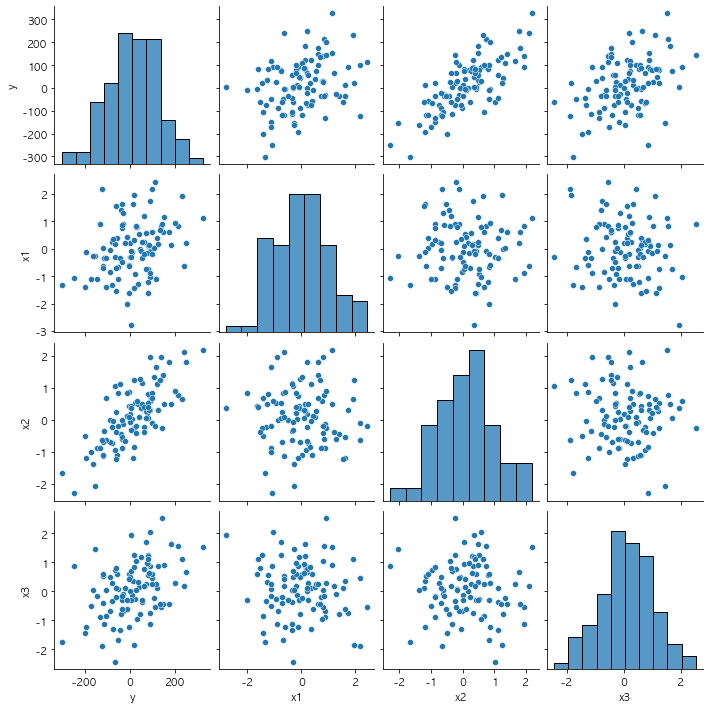

In [71]:
# 산점도 그리기
sns.pairplot(data)
plt.show()

## 중회귀모형 적합

In [74]:
# 회귀분석 적합
model = sm.OLS.from_formula("y ~ x1 + x2 + x3", data = data)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     524.2
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.30e-59
Time:                        15:44:15   Log-Likelihood:                -470.68
No. Observations:                 100   AIC:                             949.4
Df Residuals:                      96   BIC:                             959.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0329      2.773     -1.094      0.2

In [75]:
# 또는 numpy array로 바로 적합
X_1 = sm.add_constant(X)   # 1로 이루어진 열 추가

model = sm.OLS(y, X_1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     524.2
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           2.30e-59
Time:                        15:44:15   Log-Likelihood:                -470.68
No. Observations:                 100   AIC:                             949.4
Df Residuals:                      96   BIC:                             959.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0329      2.773     -1.094      0.2

### 중회귀모형에 대한 추론 (F-검정)

- $H_0: \beta_1 = \beta_2 = \dots \beta_k = 0 ~~~ \text{vs} ~~~ H_1: \text{Not } H_0$

- 위의 결과에서 F-통계량 = 524.2이고 p-value < 0.05이기 때문에 유의수준 5%에서 회귀모형이 유의하다.

- 중회귀모형에서는 단순선형회귀모형에서와 달리 회귀계수에 대한 유의성 검정과 회귀모형의 유의성 검정이 다름 (가설이 다름)

### 개별 회귀계수 $\beta_i$에 대한 추론 (t-검정)

- $H_0: \beta_i = 0$ vs $H_1: \beta_i \ne 0, ~~ i = 1, \dots, k$

- $\hat\beta_1 = 43.4412$ 이고 p-value < 0.05 이기 때문에 유의수준 0.05 하에서 귀무가설을 기각한다. (x1의 효과가 유의미하다.)

- $\hat\beta_2 = 98.5923$ 이고 p-value < 0.05 이기 때문에 유의수준 0.05 하에서 귀무가설을 기각한다. (x2의 효과가 유의미하다.)

- $\hat\beta_3 = 62.2004$ 이고 p-value < 0.05 이기 때문에 유의수준 0.05 하에서 귀무가설을 기각한다. (x3의 효과가 유의미하다.)

### 회귀분석 결과에 대한 해석
- $\hat\beta_0 = -3.03, ~~ \hat\beta_1 = 43.44, ~~ \hat\beta_2 = 98.59, ~~ \hat\beta = 62.20$ 이고 따라서 추정된 회귀식은 다음과 같다.
    $$\hat y = -3.03 + 43.44x_1 + 98.59x_2 + 62.20x_3$$

- 회귀계수에 대한 해석은 단순회귀모형에서와 동일
    - x1이 1단위 증가하면, y는 43.44 증가한다.
    - x2이 1단위 증가하면, y는 98.59 증가한다.
    - x3이 1단위 증가하면, y는 62.20 증가한다.

- 결정계수 $R^2 = 0.942$, 수정결정계수 $\text{adjusted }R^2 = 0.941$ 로 총 변동 중 회귀모형에 의해 설명되는 비율은 약 94.2%이다.
    - 단순회귀모형에서는 $R^2$와 $\text{adjusted }R^2$가 동일하지만, 중회귀에서는 다른 값을 가짐 
    - 중회귀에서 $R^2$는 독립변수 개수가 많아질수록 높아지는 경향이 있어, 이를 보완한 $\text{adjusted }R^2$을 고려

# 4. 잔차분석 (Residual analysis)

잔차(residual)를 이용하여 다음의 가정을 확인

- 정규성
- 등분산성
- 독립성

## 회귀분석 결과에서 잔차 가져오기

In [79]:
resid = result.resid
resid

array([ -6.30619797,   9.25703587,   8.76685724, -29.70632973,
       -12.81520805,  44.55718366,  31.96530005,   1.88691264,
        -9.77156168,   4.73510416,  -1.60980157, -46.08682722,
        34.958394  , -15.57799384, -52.27927421,  -5.99870827,
         0.59312675, -30.15569887,  34.01048007,  15.64915353,
       -28.15557977,  27.55157892,   2.4684856 ,  35.99305113,
        27.54987231,  26.7596183 , -24.02143179,   9.30804539,
         3.53300444,  -8.41536396, -10.25855829,  30.12013014,
        -5.2416021 , -28.38729303,   0.42748466,  57.6880076 ,
       -53.15161313,  16.85027906,  -9.37344782,  14.74069241,
       -13.26668171,  24.22103666,  63.35920948, -44.23405945,
       -29.28940184,  -3.19263221,  52.47619065, -23.39087912,
       -52.42320946,   6.30377601,  25.1560155 , -25.03501009,
       -53.05999928,  18.62859347, -24.00732036, -69.28489022,
        17.83276335, -22.44221428, -44.53939909,  -8.32915485,
        31.02023261,  17.51092115,   1.70991298,  -6.35

## 정규성 가정
- 히스토그램이 종모양을 따르는지 확인
- 또는 Q-Q plot (Quantile-Quantile plot)이 직선으로 나타나는지 확인

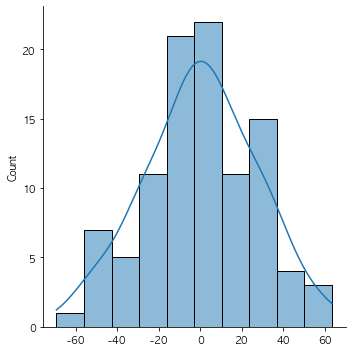

In [84]:
# 히스토그램
sns.displot(resid, kde = True)
plt.show()

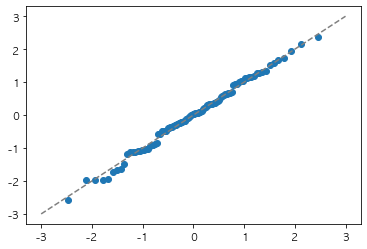

In [108]:
# Q-Q plot
sr = stats.zscore(resid)
(x_axis, y_axis), _ = stats.probplot(sr)
plt.scatter(x_axis, y_axis)
plt.plot([-3, 3], [-3, 3], '--', color='grey')
plt.show()

## 등분산성 가정
- 잔차들의 퍼짐 정도가 변하는지 확인

## 독립성 가정
- 잔차들이 랜덤하게 분포되어 있는지 확인

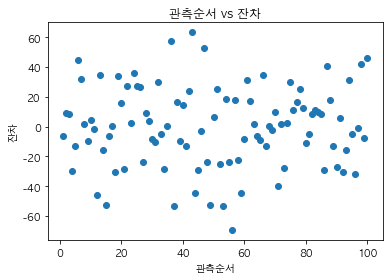

In [93]:
idx = range(1, len(resid)+1, 1)
plt.scatter(idx, resid)
plt.title("관측순서 vs 잔차")
plt.xlabel("관측순서")
plt.ylabel("잔차")
plt.show()

# 5. 범주형 독립변수
- 독립변수가 실수값의 형태가 아닌, 특정 그룹을 나타내는 경우
- 각 그룹을 0과 1의 값을 가지는 더미변수(dummy variable)로 코딩하여 회귀분석을 하고 효과를 해석할 수 있음

### 그룹이 2개인 경우
- 예를 들어, "성별"이라는 독립변수가 있고 "남성"와 "여성"의 값을 가지고 있다고 하자.
- 여기서 기준이 될 값을 0으로 두고 다른 변수를 1로 코딩하여 변수를 생성.
- 만약 "남성"를 0, "여성"을 1로 두었을 때, 이 변수의 회귀계수의 값은 남성 대비 여성의 효과를 나타낸다.

### 그룹이 3개 이상인 경우
- 그룹이 3개 이상인 경우에는 (그룹의 개수 - 1)개의 더미변수가 필요
- 예를 들어, "학급"이라는 변수가 "1반","2반",...,"5반"으로 구성되어 있다고 하자.
- 여기서 기준 그룹을 "1반"으로 결정하고, 나머지 그룹을 나타내는 4개의 더미변수를 생성
    - 더미변수1: "1반"은 0, "2반"은 1
    - 더미변수2: "1반"은 0, "3반"은 1
    - 더미변수3: "1반"은 0, "4반"은 1
    - 더미변수4: "1반"은 0, "5반"은 1

In [124]:
# 예제 데이터 생성
df = pd.DataFrame({
    "y": [2.48, 2.27, 2.47, 2.77, 2.98, 3.05, 3.18, 3.46, 3.03, 3.25, 2.67, 2.53],
    "x": [3.52, 2.58, 3.31, 4.07, 4.62, 3.98, 4.29, 4.83, 3.71, 4.61, 3.90, 3.20],
    "comp": ["A","A","A","A","A","A","B","B","B","B","B","B"]
})
df

,y,x,comp
0,2.48,3.52,A
1,2.27,2.58,A
2,2.47,3.31,A
3,2.77,4.07,A
4,2.98,4.62,A
5,3.05,3.98,A
6,3.18,4.29,B
7,3.46,4.83,B
8,3.03,3.71,B
9,3.25,4.61,B


#### 모형 적합
- 범주형 독립변수의 경우, statsmodel에서 formula를 사용하면 함수가 자동적으로 더미변수화 하여 회귀모형을 적합해줌
- 기준변수는 알파벳순으로 빠른 것이 기준이 됨

In [123]:
# 회귀모형 적합
model = sm.OLS.from_formula("y ~ x + comp", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     24.68
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           0.000222
Time:                        15:10:18   Log-Likelihood:                 6.7108
No. Observations:                  12   AIC:                            -7.422
Df Residuals:                       9   BIC:                            -5.967
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9997      0.290      3.448      0.0

/Users/hyunsung/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 회귀모형에 대한 추론 (F-검정)

- $H_0: \beta_1 = \beta_2 = 0 ~~~ \text{vs} ~~~ H_1: \text{Not } H_0$

- 위의 결과에서 F-통계량 = 24.68이고 p-value = 0.0002 < 0.05이기 때문에 유의수준 5%에서 회귀모형이 유의하다.

### 개별 회귀계수 $\beta_i$에 대한 추론 (t-검정)

#### 연속형 변수의 회귀계수 $\beta_1$에 대한 추론

- $H_0: \beta_1 = 0$ vs $H_1: \beta_1 \ne 0$

- $\hat\beta_1 = 0.4537$ 이고 p-value < 0.05 이기 때문에 유의수준 0.05 하에서 귀무가설을 기각한다. (x의 효과가 유의미하다.)


#### 범주형 변수의 회귀계수 $\beta_2$에 대한 추론

- $H_0: \beta_2 = 0$ vs $H_1: \beta_2 \ne 0$

- $\hat\beta_2 = 0.1639$ 이고 p-value = 0.127 > 0.05 이기 때문에 유의수준 0.05 하에서 귀무가설을 기각할 수 없다. (comp의 효과가 유의미하지 않다.)



### 회귀분석 결과에 대한 해석
- $\hat\beta_0 = 0.9997, ~~ \hat\beta_1 = 0.4539, ~~ \hat\beta_2 = 0.1639$ 이고 따라서 추정된 회귀식은 다음과 같다.
    $$\hat y = 0.9997 + 0.4539x + 0.1639 \text{comp}$$

- 연속형 변수 x에 대한 해석
    - x가 1단위 증가하면, y는 0.4539 증가한다.

- 범주형 변수 comp에 대한 해석
    - comp가 0에서 1로 변화하면, y는 0.1639 증가한다. (즉, comp가 "A"에 비해 "B"일 경우 y는 0.1639 더 높다.)

- 결정계수 $R^2 = 0.846$, 수정결정계수 $\text{adjusted }R^2 = 0.812$ 로 총 변동 중 회귀모형에 의해 설명되는 비율은 약 84.6%이다.

## 직접 더미변수를 만들고 회귀모형 적합
- "A"가 기준

In [139]:
# 더미변수 만들기
df_1 = df.copy()
dummy_var = np.zeros(len(df_1.comp))
dummy_var = [1  if i == "B" else 0 for i in df_1.comp]
dummy_var

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [148]:
# 또는 pandas의 함수 이용
dummy_var = pd.get_dummies(df_1.comp)
dummy_var

,A,B
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,0,1
7,0,1
8,0,1
9,0,1


In [149]:
dummy_var = dummy_var.iloc[:, 1]
dummy_var

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
11    1
Name: B, dtype: uint8

In [150]:
# 데이터프레임에 더미변수 추가
df_1["comp_dummy"] = dummy_var
df_1

,y,x,comp,comp_dummy
0,2.48,3.52,A,0
1,2.27,2.58,A,0
2,2.47,3.31,A,0
3,2.77,4.07,A,0
4,2.98,4.62,A,0
5,3.05,3.98,A,0
6,3.18,4.29,B,1
7,3.46,4.83,B,1
8,3.03,3.71,B,1
9,3.25,4.61,B,1


In [151]:
# 회귀모형 적합
model = sm.OLS.from_formula("y ~ x + comp_dummy", df_1)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     24.68
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           0.000222
Time:                        15:35:13   Log-Likelihood:                 6.7108
No. Observations:                  12   AIC:                            -7.422
Df Residuals:                       9   BIC:                            -5.967
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9997      0.290      3.448      0.0

/Users/hyunsung/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# 5. 변수 선택법 (Variable selection)

## 변수추가법 (Forward selection)
- 절편만 있는 모형에서 가장 중요한 변수부터 차례로 선택하여 모형에 추가하는 방법

## 변수제거법 (Backward elimination)
- 모든 설명변수를 모형에 포함시킨 경우부터 시작하여, 차례로 변수를 제거해 나감

## 변수증감법 (Stepwise selection)
- 새로운 변수를 선택하면 기존에 선택된 변수 가운데 제거할 변수가 있는지 확인하는 일을 반복하면서 변수선택과 변수제거를 반복적으로 시행하는 방법으로, 응용분야에서 가장 많이 사용되는 변수선택법